In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
file_location = "/Users/mingchang/Downloads/"
file_name = "orders_new.csv"
my_data = pd.read_csv(file_location + file_name)

In [44]:
my_data.head()

,country,date,experiment_id,order_id,spend_usd,user_bucket,user_id,vertical
0,IT,2017-04-01,12624549,1593533581388680355,3.799427,12,3454648139452205402,GAMES
1,BR,2017-04-01,12624548,5746748877810015202,2.546213,9,9303514494910504425,GAMES
2,NZ,2017-04-07,12624548,17361185188659735484,13.449449,2,13625318472882626688,GAMES
3,US,2017-04-02,12624549,13365437971635537789,19.990000,5,11936268987816495850,GAMES
4,US,2017-04-03,12624549,13876597780924571273,19.990000,5,11936268987816495850,GAMES


In [45]:
type(my_data.date.tolist()[0])

str

In [46]:
def GetSeries(my_data, my_id):
    table = my_data[["date", "spend_usd"]][my_data.experiment_id == my_id]
    series = table.groupby('date')['spend_usd'].sum()
    return(series)

my_series = GetSeries(my_data, 12624549)

In [47]:
my_series

date
2017-04-01    16047.543276
2017-04-02    10098.424397
2017-04-03     8810.436441
2017-04-04     7717.685555
2017-04-05     8376.836991
2017-04-06     9793.380668
2017-04-07    10152.279732
Name: spend_usd, dtype: float64

ValueError: invalid literal for float(): 2017-04-07

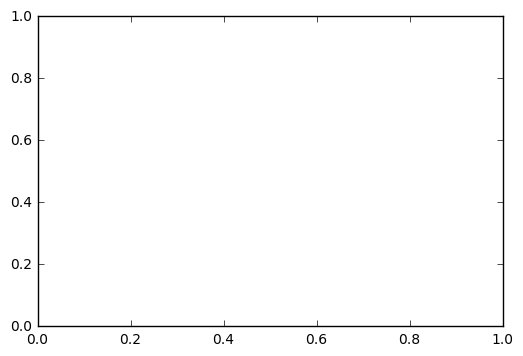

In [48]:
# error message: matplotlib cannot take string as x axis
fig, ax = plt.subplots()
ax.plot(my_series, color="red", label="experiment")
#plt.gcf().autofmt_xdate()

In [50]:
# how to fix this?
# change str format to pandas datetime
my_data.date = pd.to_datetime(my_data.date, format='%Y-%m-%d')

In [51]:
type(my_data.date[0])

pandas.tslib.Timestamp

In [52]:
# then plot
my_series = GetSeries(my_data, 12624549)

In [53]:
my_series.index

DatetimeIndex(['2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07'],
              dtype='datetime64[ns]', name=u'date', freq=None)

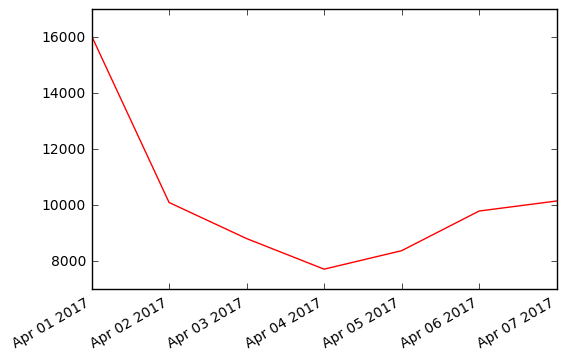

In [55]:
fig, ax = plt.subplots()
ax.plot(my_series, color="red", label="experiment")
plt.gcf().autofmt_xdate()

In [20]:
# if we don't care specific dates (normally the case)
# reset index so it's integer

In [62]:
my_series = GetSeries(my_data, 12624549)

In [63]:
my_series.index

DatetimeIndex(['2017-04-01', '2017-04-02', '2017-04-03', '2017-04-04',
               '2017-04-05', '2017-04-06', '2017-04-07'],
              dtype='datetime64[ns]', name=u'date', freq=None)

In [64]:
a = my_series.tolist()

In [65]:
a

[16047.543275999929,
 10098.424396999968,
 8810.436440999958,
 7717.6855549999636,
 8376.8369909999619,
 9793.3806679999489,
 10152.279731999937]

In [59]:
my_series = my_series.reset_index()

In [60]:
my_series

,date,spend_usd
0,2017-04-01,16047.543276
1,2017-04-02,10098.424397
2,2017-04-03,8810.436441
3,2017-04-04,7717.685555
4,2017-04-05,8376.836991
5,2017-04-06,9793.380668
6,2017-04-07,10152.279732


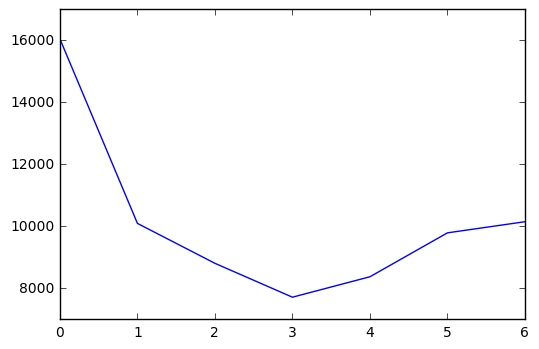

In [66]:
fig, ax = plt.subplots()
#ax.plot(my_series.spend_usd, color="red", label="experiment")
ax.plot(a)